In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import pandas as pd

from SAES.plots.boxplot import boxplot
from SAES.plots.boxplot import boxplot_all_instances
from SAES.plots.boxplot import boxplots_all_metrics_instances
from SAES.plots.critical_distance_plot import CDplot
from SAES.plots.critical_distance_plot import CDplot_all_metrics
from SAES.latex_generation.latex_skeleton import latex_all_metrics
from SAES.latex_generation.latex_skeleton import latex_selected
from SAES.latex_generation.latex_skeleton import latex
from SAES.utils.csv_processor import obtain_list_metrics
from SAES.utils.csv_processor import obtain_list_instances

In [8]:
# Load the experiment data
experimentData = pd.read_csv('ZCATSummary.csv')
metrics = pd.read_csv('multiobjectiveMetrics.csv')

metrics_list = obtain_list_metrics(metrics)
instances = obtain_list_instances(experimentData)

In [4]:
latex(experimentData, metrics, "HV", output_path="/home/khaosdev/SAES/notebooks/multiobjective_optimization")

[2025-01-27 17:06:00,868] [SAES.latex_generation.latex_skeleton] [INFO] LaTeX document for metric HV saved to /home/rorro6787/Escritorio/Universidad/TrabajoInvestigacion/SAES/notebooks/multiobjective_optimization/outputs/latex/HV


'/home/rorro6787/Escritorio/Universidad/TrabajoInvestigacion/SAES/notebooks/multiobjective_optimization/outputs/latex/HV'

In [9]:
latex_selected(experimentData, metrics, "HV", selected="median")

[2025-01-27 10:39:49,312] [SAES.latex_generation.latex_skeleton] [INFO] LaTeX median document for metric HV saved to /home/khaosdev/SAES/notebooks/ZCAT_study/outputs/latex/HV


'/home/khaosdev/SAES/notebooks/ZCAT_study/outputs/latex/HV/median.tex'

In [4]:
latex_all_metrics(experimentData, metrics, output_path="/home/khaosdev/SAES/notebooks/multiobjective_optimization")

[2025-01-27 10:38:11,669] [SAES.latex_generation.latex_skeleton] [INFO] LaTeX document for metric EP saved to /home/khaosdev/SAES/notebooks/multiobjective_optimization/outputs/latex/EP
[2025-01-27 10:38:12,739] [SAES.latex_generation.latex_skeleton] [INFO] LaTeX document for metric HV saved to /home/khaosdev/SAES/notebooks/multiobjective_optimization/outputs/latex/HV
[2025-01-27 10:38:13,819] [SAES.latex_generation.latex_skeleton] [INFO] LaTeX document for metric NHV saved to /home/khaosdev/SAES/notebooks/multiobjective_optimization/outputs/latex/NHV
[2025-01-27 10:38:14,919] [SAES.latex_generation.latex_skeleton] [INFO] LaTeX document for metric IGD+ saved to /home/khaosdev/SAES/notebooks/multiobjective_optimization/outputs/latex/IGD+


'/home/khaosdev/SAES/notebooks/multiobjective_optimization/outputs/latex'

In [4]:
CDplot(experimentData, metrics, "HV", show=False)

[2025-01-27 10:32:37,579] [SAES.plots.critical_distance_plot] [INFO] Critical distance for metric HV saved to /home/khaosdev/SAES/notebooks/ZCAT_study/outputs/critical_distance


'/home/khaosdev/SAES/notebooks/ZCAT_study/outputs/critical_distance'

In [9]:
CDplot_all_metrics(experimentData, metrics, output_path="/home/khaosdev/SAES/notebooks/multiobjective_optimization")

[2025-01-27 17:15:08,900] [SAES.plots.critical_distance_plot] [INFO] Critical distance for metric EP saved to /home/rorro6787/Escritorio/Universidad/TrabajoInvestigacion/SAES/notebooks/multiobjective_optimization/outputs/critical_distance
[2025-01-27 17:15:09,058] [SAES.plots.critical_distance_plot] [INFO] Critical distance for metric HV saved to /home/rorro6787/Escritorio/Universidad/TrabajoInvestigacion/SAES/notebooks/multiobjective_optimization/outputs/critical_distance
[2025-01-27 17:15:09,219] [SAES.plots.critical_distance_plot] [INFO] Critical distance for metric NHV saved to /home/rorro6787/Escritorio/Universidad/TrabajoInvestigacion/SAES/notebooks/multiobjective_optimization/outputs/critical_distance
[2025-01-27 17:15:09,389] [SAES.plots.critical_distance_plot] [INFO] Critical distance for metric IGD+ saved to /home/rorro6787/Escritorio/Universidad/TrabajoInvestigacion/SAES/notebooks/multiobjective_optimization/outputs/critical_distance


'/home/rorro6787/Escritorio/Universidad/TrabajoInvestigacion/SAES/notebooks/multiobjective_optimization/outputs/critical_distance'

In [4]:
boxplots_all_metrics_instances(experimentData, metrics)

[2025-01-27 10:26:48,983] [SAES.plots.boxplot] [INFO] Boxplots for metric EP saved to /home/khaosdev/SAES/notebooks/ZCAT_study/outputs/boxplots/EP
[2025-01-27 10:26:53,166] [SAES.plots.boxplot] [INFO] Boxplots for metric HV saved to /home/khaosdev/SAES/notebooks/ZCAT_study/outputs/boxplots/HV
[2025-01-27 10:26:57,283] [SAES.plots.boxplot] [INFO] Boxplots for metric NHV saved to /home/khaosdev/SAES/notebooks/ZCAT_study/outputs/boxplots/NHV
[2025-01-27 10:27:01,451] [SAES.plots.boxplot] [INFO] Boxplots for metric IGD+ saved to /home/khaosdev/SAES/notebooks/ZCAT_study/outputs/boxplots/IGD+


'/home/khaosdev/SAES/notebooks/ZCAT_study/outputs/boxplots'

In [ ]:
boxplot_all_instances(experimentData, metrics, "HV", output_path="/home/khaosdev/SAES/notebooks/multiobjective_optimization")

[2025-01-27 10:23:11,314] [SAES.plots.boxplot] [INFO] Boxplots for metric HV saved to /home/khaosdev/SAES/notebooks/ZCAT_study/outputs/boxplots/HV


'/home/khaosdev/SAES/notebooks/ZCAT_study/outputs/boxplots/HV'

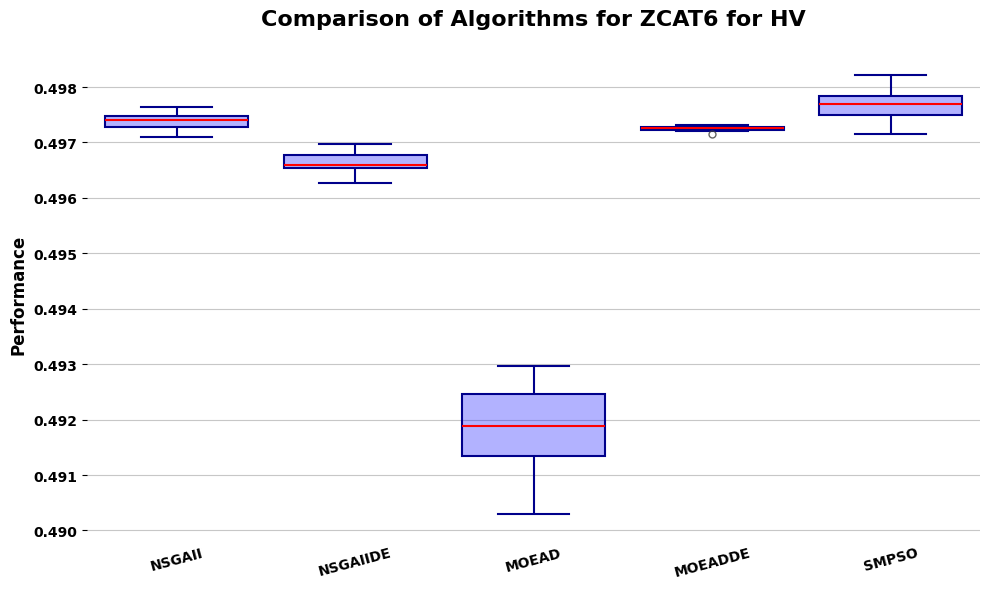

'Boxplot displayed'

In [6]:
boxplot(experimentData, metrics, "HV", "ZCAT6", show=True)

In [4]:
for metric in metrics_list:
    for instance in instances:
        boxplot(experimentData, metrics, metric, instance, show=False)

[2025-01-22 13:19:42,346] [SAES.plots.boxplot] [INFO] Boxplots for metric EP saved to /home/khaosdev/SAES/notebooks/ZCAT_study/outputs/boxplots/EP
[2025-01-22 13:19:42,626] [SAES.plots.boxplot] [INFO] Boxplots for metric EP saved to /home/khaosdev/SAES/notebooks/ZCAT_study/outputs/boxplots/EP
[2025-01-22 13:19:42,813] [SAES.plots.boxplot] [INFO] Boxplots for metric EP saved to /home/khaosdev/SAES/notebooks/ZCAT_study/outputs/boxplots/EP
[2025-01-22 13:19:43,025] [SAES.plots.boxplot] [INFO] Boxplots for metric EP saved to /home/khaosdev/SAES/notebooks/ZCAT_study/outputs/boxplots/EP
[2025-01-22 13:19:43,325] [SAES.plots.boxplot] [INFO] Boxplots for metric EP saved to /home/khaosdev/SAES/notebooks/ZCAT_study/outputs/boxplots/EP
[2025-01-22 13:19:43,541] [SAES.plots.boxplot] [INFO] Boxplots for metric EP saved to /home/khaosdev/SAES/notebooks/ZCAT_study/outputs/boxplots/EP
[2025-01-22 13:19:43,732] [SAES.plots.boxplot] [INFO] Boxplots for metric EP saved to /home/khaosdev/SAES/notebooks/ZC

In [1]:
from IPython.display import display, Javascript

def create_markdown_cell(content):
    """
    Inserta una celda de Markdown justo después de la celda que se ejecuta.
    """
    js_code = f'''
    var cell = Jupyter.notebook.insert_cell_below('markdown');
    cell.set_text(`{content}`);
    Jupyter.notebook.execute_cell();
    '''
    display(Javascript(js_code))

# Ejemplo: Crear una celda de Markdown con texto
create_markdown_cell("# Esto es una nueva celda de Markdown\n- Lista 1\n- Lista 2")


<IPython.core.display.Javascript object>

In [1]:
def contador(maximo):
    contador_actual = 1
    while contador_actual <= maximo:
        yield contador_actual
        contador_actual += 1

# Crear un generador
generador = contador(5)

# Consumir los valores
for numero in generador:
    print(numero)

# Salida:
# 1
# 2
# 3
# 4
# 5


1
2
3
4
5
